In [5]:
# ===== Step 0: Imports =====
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [7]:
# ===== Step 1: Load data =====
# Ensure your file is named exactly "Iris.csv" and is in the same folder.
df = pd.read_csv("Iris.csv")

In [9]:
# Use only the 4 numeric feature columns
X = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values

In [11]:
# ===== Step 2: Scale features (helps K-Means) =====
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

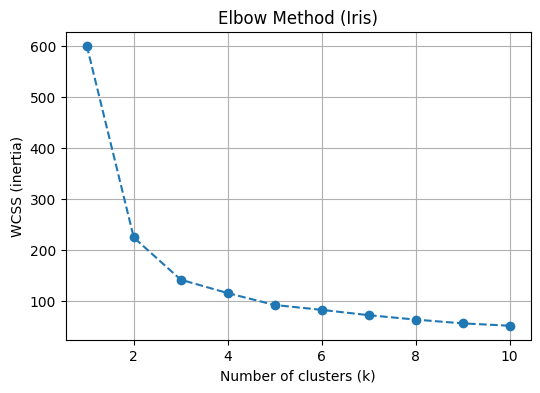

In [13]:
# ===== Step 3: Elbow Method to choose k =====
wcss = []  # Within-Cluster Sum of Squares (inertia)
for k in range(1, 11):
    km = KMeans(n_clusters=k, init="k-means++", n_init=10, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1, 11), wcss, marker="o", linestyle="--")
plt.title("Elbow Method (Iris)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS (inertia)")
plt.grid(True)
plt.show()

In [15]:
# -----> From the elbow, choose k = 3 (standard for Iris)

# ===== Step 4: Fit final K-Means with k=3 =====
k_opt = 3
kmeans = KMeans(n_clusters=k_opt, init="k-means++", n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [17]:
# Add cluster labels back to the dataframe
df["Cluster"] = clusters
print(df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","Cluster"]].head())
print("\nCluster counts:\n", df["Cluster"].value_counts().sort_index())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Cluster
0            5.1           3.5            1.4           0.2        1
1            4.9           3.0            1.4           0.2        1
2            4.7           3.2            1.3           0.2        1
3            4.6           3.1            1.5           0.2        1
4            5.0           3.6            1.4           0.2        1

Cluster counts:
 Cluster
0    53
1    50
2    47
Name: count, dtype: int64


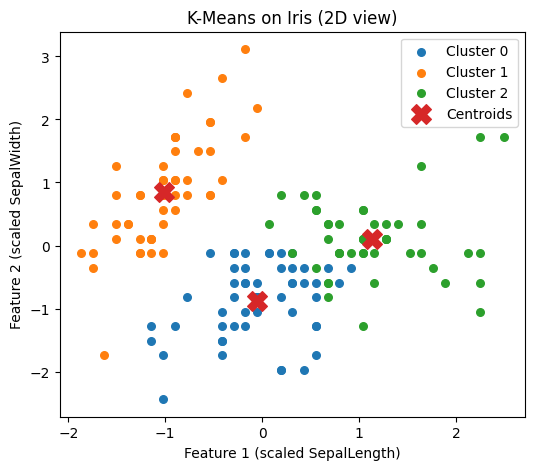

In [19]:
# ===== Step 5: Quick 2-D visualization (first two scaled features) =====
plt.figure(figsize=(6,5))
for c in range(k_opt):
    plt.scatter(
        X_scaled[clusters==c, 0], X_scaled[clusters==c, 1],
        s=30, label=f"Cluster {c}"
    )

# Plot centroids (in scaled space)
plt.scatter(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    s=200, marker="X", label="Centroids"
)
plt.title("K-Means on Iris (2D view)")
plt.xlabel("Feature 1 (scaled SepalLength)")
plt.ylabel("Feature 2 (scaled SepalWidth)")
plt.legend()
plt.show()